## Demographic Impacts on Air Quality (Housing Density and Social Vulnerability)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

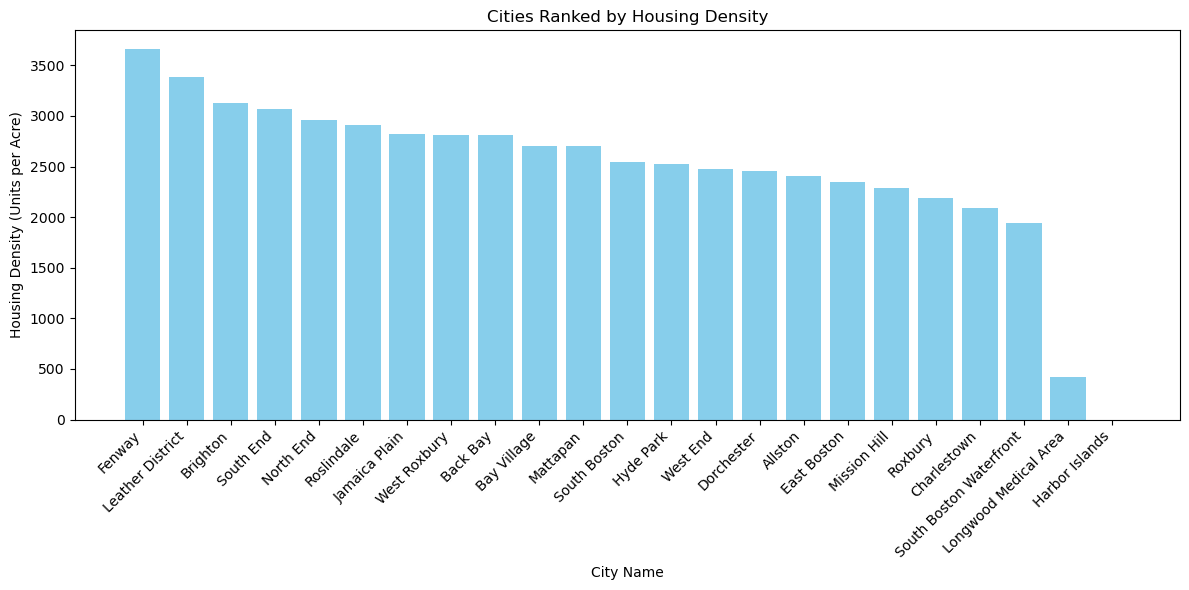

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

data['Housing Density'] = data['HU100_RE'] 

data_sorted = data.sort_values(by='Housing Density', ascending=False)

# Create the bar chart for all cities
plt.figure(figsize=(12, 6))
plt.bar(data_sorted['Name'], data_sorted['Housing Density'], color='skyblue')
plt.xlabel('City Name')
plt.ylabel('Housing Density (Units per Acre)')
plt.title('Cities Ranked by Housing Density')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


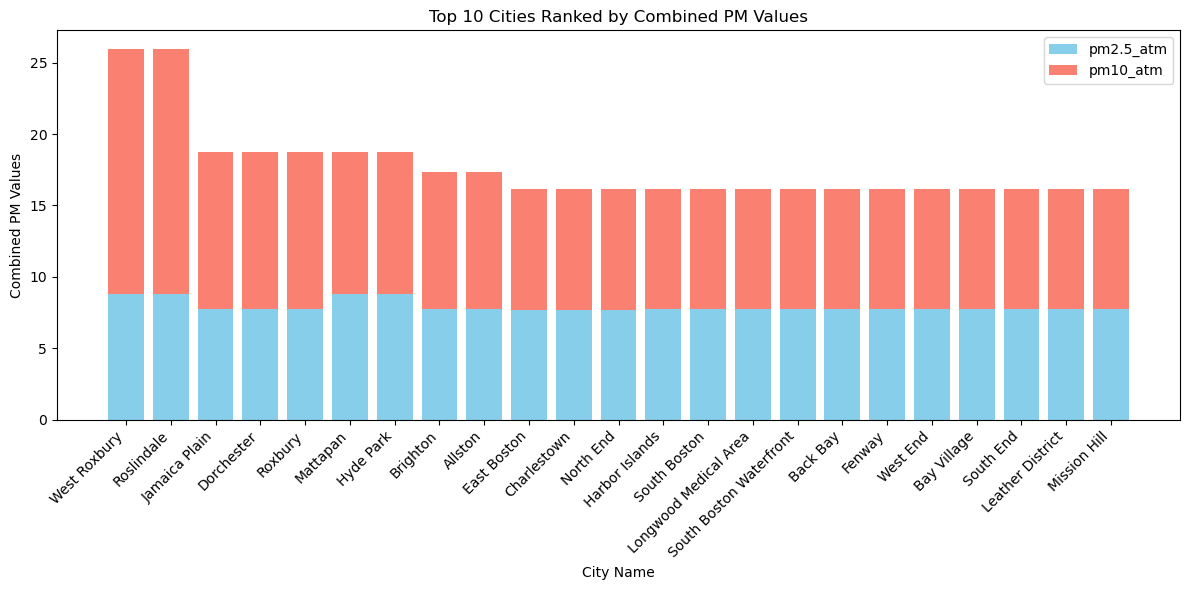

In [73]:
import matplotlib.pyplot as plt

# Combining the PM values
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']
data_sorted = data.sort_values(by='Combined_PM', ascending=False)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(data_sorted['Name'], data_sorted['pm2.5_atm'], label='pm2.5_atm', color='skyblue')
plt.bar(data_sorted['Name'], data_sorted['pm10_atm'], bottom=data_sorted['pm2.5_atm'], label='pm10_atm', color='salmon')
plt.xlabel('City Name')
plt.ylabel('Combined PM Values')
plt.title('Top 10 Cities Ranked by Combined PM Values')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

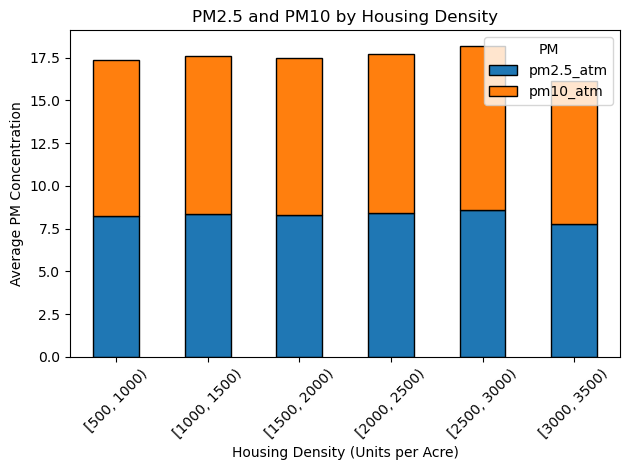

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate combined PM (pm2.5_atm + pm10_atm)
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']

# Define the bin edges for housing density
bin_edges = [500, 1000, 1500, 2000, 2500, 3000, 3500]  # Adjust the bin edges as needed

data['Housing Density Bin'] = pd.cut(data['Housing Density'], bins=bin_edges, right=False)

grouped_data = data.groupby('Housing Density Bin')[['pm2.5_atm', 'pm10_atm']].mean()

# Plot the data as a stacked bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('PM2.5 and PM10 by Housing Density')
plt.xlabel('Housing Density (Units per Acre)')
plt.ylabel('Average PM Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='PM', labels=['pm2.5_atm', 'pm10_atm'])
plt.show()


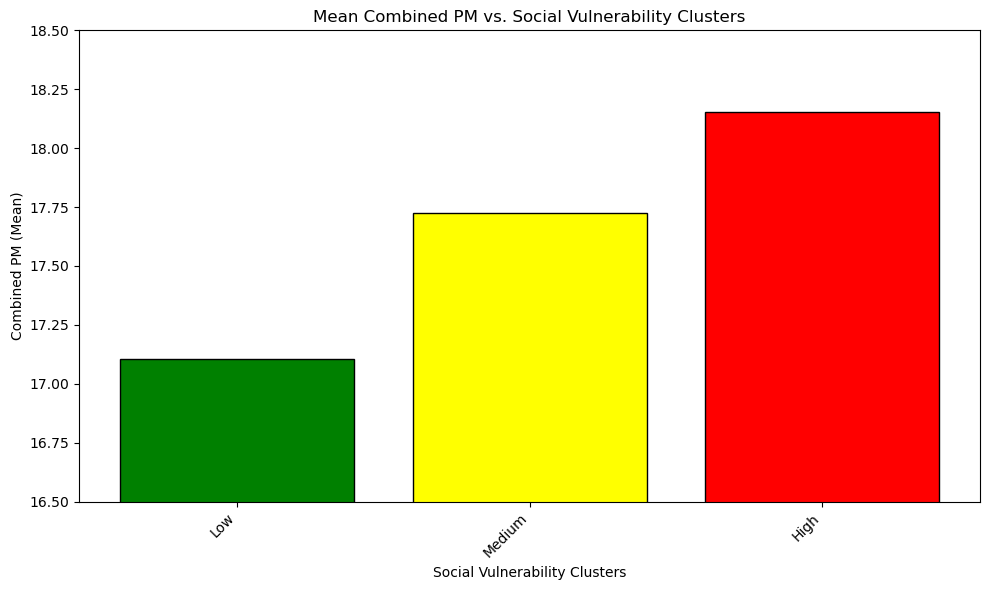

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define your social vulnerability categories (e.g., 'OlderAdult', 'TotChild', 'POC2', 'LEP', 'Low_to_No', 'TotDis', 'MedIllnes')
vulnerability_categories = ['OlderAdult', 'TotChild', 'POC2', 'LEP', 'Low_to_No', 'TotDis', 'MedIllnes']

# Rank cities by social vulnerability
data['Total_Social_Vulnerability'] = data[vulnerability_categories].sum(axis=1)
data_sorted = data.sort_values(by='Total_Social_Vulnerability', ascending=False)

# Calculate 'pm2.5_atm' + 'pm10_atm' and add it as a new column
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']

# Define the number of bins for mean social vulnerability
num_bins = 3

# Bin the data based on the mean social vulnerability and calculate the mean 'Combined_PM' for each bin
data['Social_Vulnerability_Bin'] = pd.cut(data['Total_Social_Vulnerability'], bins=num_bins)
combined_pm_means = data.groupby('Social_Vulnerability_Bin')['Combined_PM'].mean()

# Create a bar plot of binned 'pm2.5_atm' + 'pm10_atm' vs. Mean Social Vulnerability
plt.figure(figsize=(10, 6))
plt.bar(combined_pm_means.index.astype(str), combined_pm_means, tick_label=['Low', 'Medium', 'High'], color=['green', 'yellow', 'red'], edgecolor='black')
plt.ylabel('Combined PM (Mean)')
plt.ylim(16.5, 18.5)
plt.xlabel('Social Vulnerability Clusters')
plt.title('Mean Combined PM vs. Social Vulnerability Clusters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()